# Stock Backtesting Framework - Comprehensive Demo

This notebook demonstrates all the functionalities of the stock backtesting framework, including:

1. **Flexible Data Sources** - Pluggable data source architecture supporting multiple providers
2. **Data Fetching** - Retrieving historical stock data with built-in validation and normalization
3. **Strategy Implementation** - Various trading strategies (Moving Average, RSI, MACD)
4. **Backtesting Engine** - Running strategies against historical data
5. **Trading Costs & Taxes** - Realistic cost modeling and tax calculations
6. **Performance Analysis** - Comprehensive metrics and analysis
7. **Visualization** - Interactive charts and performance graphs
8. **Strategy Comparison** - Comparing multiple strategies
9. **Custom Strategy Creation** - Building your own trading strategies

## 🆕 New Features

- **Flexible Data Source Architecture**: Easy switching between data providers (Yahoo Finance, Alpha Vantage, IEX Cloud, etc.)
- **Configuration-Driven**: Data source selection via configuration files
- **Backward Compatible**: All existing code continues to work unchanged
- **Enhanced Error Handling**: Robust validation and error reporting

---


## Setup and Imports

First, let's import all necessary libraries and set up the environment.


In [1]:
# Standard library imports
import sys
import os
import warnings
from datetime import datetime, date
import logging

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Add the project root to Python path
project_root = os.path.dirname(os.path.abspath('.'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import our framework modules
from src.data.data_fetcher import DataFetcher
from src.data.data_source_factory import DataSourceFactory
from src.strategies.moving_average import MovingAverageStrategy
from src.strategies.rsi_strategy import RSIStrategy
from src.strategies.macd_strategy import MACDStrategy
from src.strategies.buy_and_hold import BuyAndHoldStrategy
from src.backtesting.engine import BacktestEngine, BacktestResults
from src.visualization.plots import BacktestPlots
from config.settings import get_setting

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ All imports successful!")
print(f"📁 Project root: {project_root}")
print(f"🐍 Python version: {sys.version}")


✅ All imports successful!
📁 Project root: c:\projects
🐍 Python version: 3.9.23 | packaged by conda-forge | (main, Jun  4 2025, 17:49:16) [MSC v.1929 64 bit (AMD64)]


## 1. Data Fetching

Let's start by fetching historical data for multiple stocks to demonstrate the data fetching capabilities.


In [2]:
# Initialize data fetcher
fetcher = DataFetcher()

# Define symbols to fetch
symbols = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']
start_date = '2020-01-01'
end_date = '2023-12-31'

print(f"📊 Fetching data for {len(symbols)} symbols from {start_date} to {end_date}")
print("=" * 60)

# Fetch data for all symbols
data_dict = {}
for symbol in symbols:
    try:
        data = fetcher.get_data(symbol, start_date, end_date)
        data_dict[symbol] = data
        print(f"✅ {symbol}: {len(data)} records")
        print(f"   Date range: {data.index[0].date()} to {data.index[-1].date()}")
        print(f"   Columns: {list(data.columns)}")
    except Exception as e:
        print(f"❌ {symbol}: Error - {e}")

print(f"\n📈 Successfully fetched data for {len(data_dict)} symbols")


2025-09-14 18:57:23,225 - INFO - Created data source: yahoo_finance
2025-09-14 18:57:23,225 - INFO - Initialized DataFetcher with yahoo_finance data source


📊 Fetching data for 5 symbols from 2020-01-01 to 2023-12-31


2025-09-14 18:57:23,803 - INFO - Successfully fetched 1006 records for AAPL
2025-09-14 18:57:23,936 - INFO - Successfully fetched 1006 records for MSFT


✅ AAPL: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']
✅ MSFT: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']


2025-09-14 18:57:24,033 - INFO - Successfully fetched 1006 records for GOOGL
2025-09-14 18:57:24,159 - INFO - Successfully fetched 1006 records for TSLA


✅ GOOGL: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']
✅ TSLA: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']


2025-09-14 18:57:24,261 - INFO - Successfully fetched 1006 records for AMZN


✅ AMZN: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']

📈 Successfully fetched data for 5 symbols


## 1.1. Flexible Data Source Architecture

The framework now features a flexible, pluggable data source architecture that makes it easy to switch between different data providers and add new ones in the future.


In [3]:
# Demonstrate the flexible data source architecture
print("🔧 FLEXIBLE DATA SOURCE ARCHITECTURE")
print("=" * 60)

# Show available data sources
available_sources = DataSourceFactory.get_available_sources()
print(f"📊 Available data sources: {available_sources}")

# Show current data source
print(f"🎯 Current data source: {fetcher.get_current_data_source()}")
print(f"⚙️  Default source from config: {get_setting('data', 'default_data_source')}")

# Show data source configuration
yahoo_config = get_setting('data_source', 'yahoo_finance', {})
print(f"🔧 Yahoo Finance configuration: {yahoo_config}")

print("\n💡 Key Benefits:")
print("   • Easy switching between data sources")
print("   • Simple to add new data providers")
print("   • Configuration-driven source selection")
print("   • Backward compatibility maintained")
print("   • Built-in data validation and normalization")

print("\n🚀 Usage Examples:")
print("   # Switch data source at runtime")
print("   # fetcher.switch_data_source('alpha_vantage', api_key='your_key')")
print("   # Create with specific source")
print("   # fetcher = DataFetcher(data_source='alpha_vantage', api_key='your_key')")


🔧 FLEXIBLE DATA SOURCE ARCHITECTURE
📊 Available data sources: ['yahoo_finance']
🎯 Current data source: YahooFinanceDataSource
⚙️  Default source from config: yahoo_finance
🔧 Yahoo Finance configuration: {'timeout': 10, 'max_retries': 3, 'retry_delay': 1.0}

💡 Key Benefits:
   • Easy switching between data sources
   • Simple to add new data providers
   • Configuration-driven source selection
   • Backward compatibility maintained
   • Built-in data validation and normalization

🚀 Usage Examples:
   # Switch data source at runtime
   # fetcher.switch_data_source('alpha_vantage', api_key='your_key')
   # Create with specific source
   # fetcher = DataFetcher(data_source='alpha_vantage', api_key='your_key')


In [4]:
# Display sample data for AAPL
if 'AAPL' in data_dict:
    print("📋 Sample data for AAPL:")
    print(data_dict['AAPL'].head(10))
    print("\n📊 Data info:")
    print(data_dict['AAPL'].info())
    print("\n📈 Basic statistics:")
    print(data_dict['AAPL'].describe())


📋 Sample data for AAPL:
                                open       high        low      close  \
Date                                                                    
2020-01-02 00:00:00-05:00  71.545897  72.598899  71.292311  72.538521   
2020-01-03 00:00:00-05:00  71.765667  72.594055  71.608685  71.833290   
2020-01-06 00:00:00-05:00  70.954188  72.444321  70.703012  72.405678   
2020-01-07 00:00:00-05:00  72.415337  72.671341  71.845369  72.065147   
2020-01-08 00:00:00-05:00  71.768094  73.526310  71.768094  73.224419   
2020-01-09 00:00:00-05:00  74.202542  74.972970  73.951373  74.779762   
2020-01-10 00:00:00-05:00  75.014028  75.513962  74.446470  74.948814   
2020-01-13 00:00:00-05:00  75.265196  76.576611  75.146850  76.550041   
2020-01-14 00:00:00-05:00  76.487261  76.697376  75.393206  75.516373   
2020-01-15 00:00:00-05:00  75.315931  76.197453  74.760446  75.192757   

                              volume  dividends  stock_splits  
Date                               

## 2. Data Visualization

Let's create some visualizations to understand our data better.


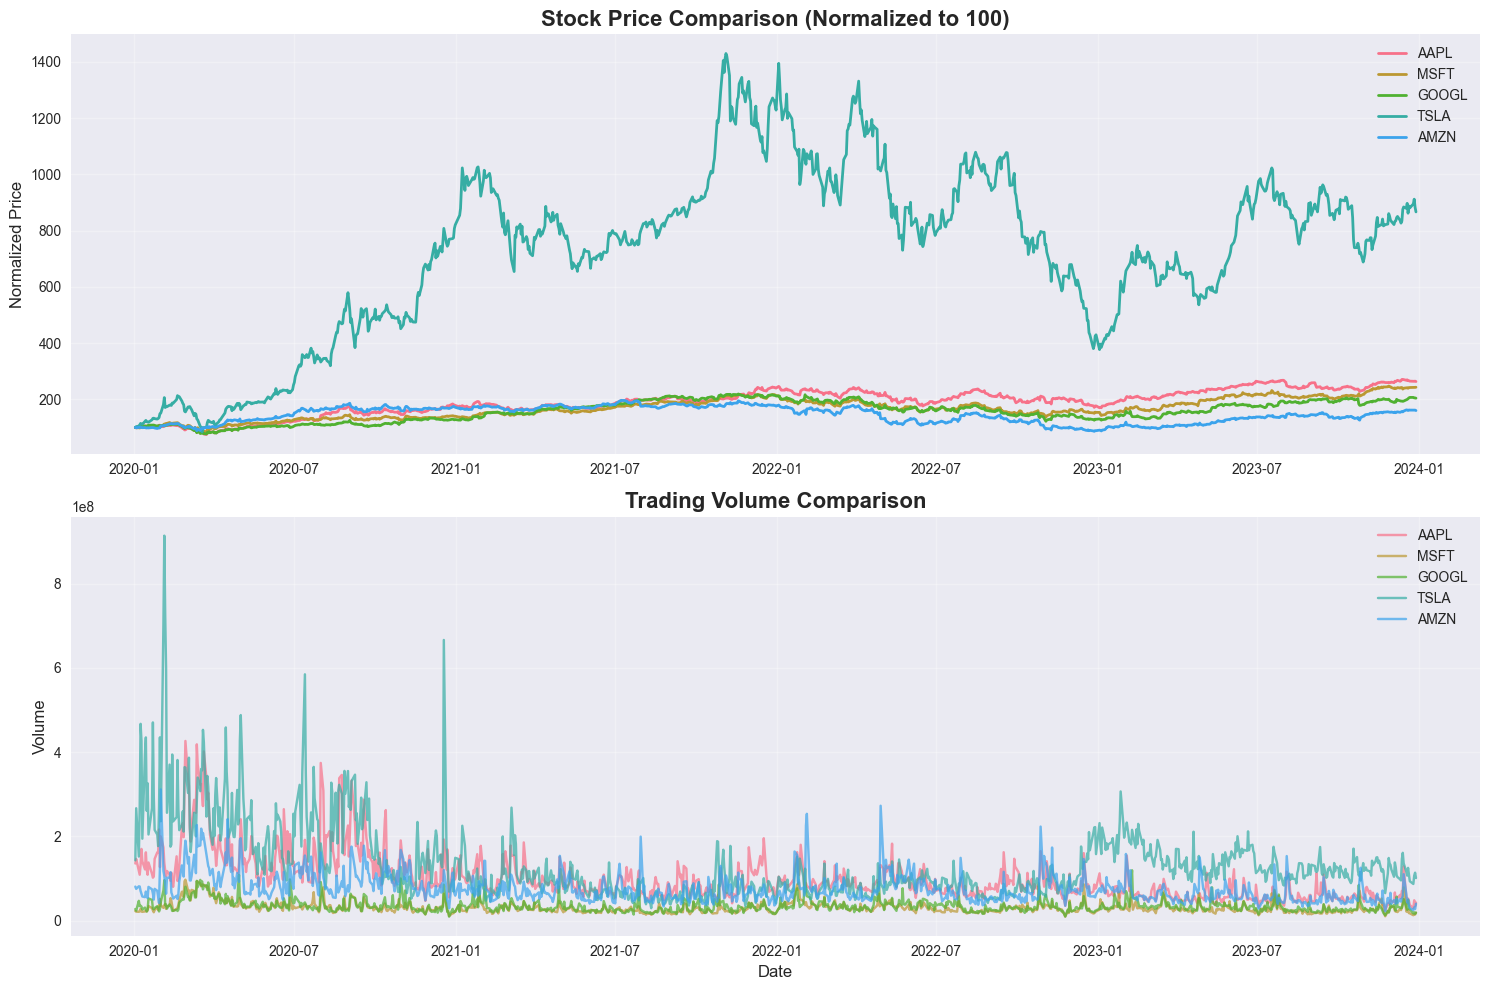

In [5]:
# Create price comparison chart
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Price comparison (normalized)
ax1 = axes[0]
for symbol, data in data_dict.items():
    normalized_price = data['close'] / data['close'].iloc[0] * 100
    ax1.plot(data.index, normalized_price, label=symbol, linewidth=2)

ax1.set_title('Stock Price Comparison (Normalized to 100)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Normalized Price', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Volume comparison
ax2 = axes[1]
for symbol, data in data_dict.items():
    ax2.plot(data.index, data['volume'], label=symbol, alpha=0.7)

ax2.set_title('Trading Volume Comparison', fontsize=16, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Volume', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 🎯 Buy & Hold Benchmark Strategy

The **Buy & Hold** strategy serves as a crucial benchmark for evaluating other trading strategies. It represents the simplest possible approach: buy at the beginning and hold until the end. This strategy helps answer the fundamental question: "Does my trading strategy actually add value compared to simply buying and holding?"

**Why Buy & Hold is Important:**
- **Baseline Performance**: Provides a reference point for strategy evaluation
- **Cost Comparison**: Shows the impact of trading costs vs. no trading
- **Market Performance**: Represents the pure market return without strategy intervention
- **Risk Assessment**: Helps determine if active trading reduces risk or just adds complexity

**Key Characteristics:**
- Single trade at the beginning (buy)
- No subsequent trading decisions
- Minimal trading costs (only one buy trade)
- Pure market exposure throughout the period


## 3. Strategy Implementation

Now let's create and test various trading strategies. We'll start with the Moving Average strategy.


In [6]:
# Use AAPL as our primary test symbol
primary_symbol = 'AAPL'
data = data_dict[primary_symbol]

print(f"🎯 Testing strategies on {primary_symbol}")
print(f"📅 Data period: {data.index[0].date()} to {data.index[-1].date()}")
print(f"📊 Total records: {len(data)}")
print("=" * 60)

# Create different strategy configurations
strategies = {
    'Buy & Hold': BuyAndHoldStrategy(primary_symbol),
    'MA (10,30)': MovingAverageStrategy(10, 30, primary_symbol),
    'MA (20,50)': MovingAverageStrategy(20, 50, primary_symbol),
    'MA (50,200)': MovingAverageStrategy(50, 200, primary_symbol),
    'RSI (14,30/70)': RSIStrategy(14, 30, 70, primary_symbol),
    'RSI (21,25/75)': RSIStrategy(21, 25, 75, primary_symbol),
    'MACD (12,26,9)': MACDStrategy(12, 26, 9, primary_symbol),
    'MACD (8,21,5)': MACDStrategy(8, 21, 5, primary_symbol)
}

print(f"✅ Created {len(strategies)} trading strategies:")
for name, strategy in strategies.items():
    print(f"   • {name}: {strategy.get_parameters()}")


🎯 Testing strategies on AAPL
📅 Data period: 2020-01-02 to 2023-12-29
📊 Total records: 1006
✅ Created 8 trading strategies:
   • Buy & Hold: {'symbol': 'AAPL'}
   • MA (10,30): {'short_window': 10, 'long_window': 30, 'symbol': 'AAPL'}
   • MA (20,50): {'short_window': 20, 'long_window': 50, 'symbol': 'AAPL'}
   • MA (50,200): {'short_window': 50, 'long_window': 200, 'symbol': 'AAPL'}
   • RSI (14,30/70): {'period': 14, 'oversold_threshold': 30, 'overbought_threshold': 70, 'symbol': 'AAPL'}
   • RSI (21,25/75): {'period': 21, 'oversold_threshold': 25, 'overbought_threshold': 75, 'symbol': 'AAPL'}
   • MACD (12,26,9): {'fast_period': 12, 'slow_period': 26, 'signal_period': 9, 'symbol': 'AAPL'}
   • MACD (8,21,5): {'fast_period': 8, 'slow_period': 21, 'signal_period': 5, 'symbol': 'AAPL'}


## 4. Backtesting Engine

Let's run backtests for all our strategies and compare their performance.


## 5. Trading Costs and Tax Analysis

One of the key features of this framework is its ability to model realistic trading costs and tax implications. Let's explore different cost structures and their impact on strategy performance.


In [7]:
# Define different cost and tax configurations
cost_tax_configs = {
    'No Costs, No Taxes': {
        'trading_costs': {
            'cost_type': 'fixed',
            'fixed_cost_per_trade': 0.0,
            'percentage_cost_per_trade': 0.0,
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.0,
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    },
    'Fixed Costs (10 EUR per trade)': {
        'trading_costs': {
            'cost_type': 'fixed',
            'fixed_cost_per_trade': 10.0,
            'percentage_cost_per_trade': 0.0,
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.0,
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    },
    'Percentage Costs (0.2%)': {
        'trading_costs': {
            'cost_type': 'percentage',
            'fixed_cost_per_trade': 0.0,
            'percentage_cost_per_trade': 0.002,  # 0.2%
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.0,
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    },
    'Fixed Costs + 25% Tax': {
        'trading_costs': {
            'cost_type': 'fixed',
            'fixed_cost_per_trade': 10.0,
            'percentage_cost_per_trade': 0.0,
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.25,  # 25% tax on profits
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    },
    'Realistic Costs + Taxes': {
        'trading_costs': {
            'cost_type': 'percentage',
            'fixed_cost_per_trade': 0.0,
            'percentage_cost_per_trade': 0.005,  # 0.5%
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.30,  # 30% tax on profits
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    }
}

print("💰 Trading Costs and Tax Configurations:")
print("=" * 60)
for name, config in cost_tax_configs.items():
    print(f"📋 {name}")
    
    # Display correct cost value based on cost type
    cost_type = config['trading_costs']['cost_type']
    if cost_type == 'fixed':
        cost_value = config['trading_costs']['fixed_cost_per_trade']
        print(f"   Trading Costs: {cost_type} - {cost_value} EUR per trade")
    elif cost_type == 'percentage':
        cost_value = config['trading_costs']['percentage_cost_per_trade']
        print(f"   Trading Costs: {cost_type} - {cost_value:.1%} of trade value")
    else:
        print(f"   Trading Costs: {cost_type} - 0")
    
    print(f"   Tax Rate: {config['tax_config']['tax_rate']:.1%}")
    print()


💰 Trading Costs and Tax Configurations:
📋 No Costs, No Taxes
   Trading Costs: fixed - 0.0 EUR per trade
   Tax Rate: 0.0%

📋 Fixed Costs (10 EUR per trade)
   Trading Costs: fixed - 10.0 EUR per trade
   Tax Rate: 0.0%

📋 Percentage Costs (0.2%)
   Trading Costs: percentage - 0.2% of trade value
   Tax Rate: 0.0%

📋 Fixed Costs + 25% Tax
   Trading Costs: fixed - 10.0 EUR per trade
   Tax Rate: 25.0%

📋 Realistic Costs + Taxes
   Trading Costs: percentage - 0.5% of trade value
   Tax Rate: 30.0%



In [8]:
# Test the buy-and-hold strategy with different cost and tax configurations
print("🧪 Testing Buy & Hold strategy with different cost/tax configurations...")
print("=" * 80)

# Use the Buy & Hold strategy as benchmark for cost/tax analysis
test_strategy = BuyAndHoldStrategy(primary_symbol)
cost_tax_results = {}

for config_name, config in cost_tax_configs.items():
    print(f"\n🔄 Testing: {config_name}")
    print("-" * 50)
    
    # Create engine with specific configuration
    engine = BacktestEngine(
        initial_capital=10000,
        trading_costs_config=config['trading_costs'],
        tax_config=config['tax_config']
    )
    
    try:
        result = engine.run_backtest(data, test_strategy)
        cost_tax_results[config_name] = result
        
        # Print summary
        summary = result.summary()
        print(f"   Final Value: ${summary['final_value']:.2f}")
        print(f"   Total Return: {summary['total_return']}")
        print(f"   Total Trades: {summary['total_trades']}")
        print(f"   Trading Costs: {summary['trading_costs_paid']}")
        print(f"   Taxes: {summary['taxes_paid']}")
        
    except Exception as e:
        print(f"   ❌ Error: {e}")

print(f"\n✅ Completed {len(cost_tax_results)} cost/tax configuration tests")


2025-09-14 18:57:25,108 - INFO - Starting backtest with BuyAndHoldStrategy
2025-09-14 18:57:25,109 - INFO - Initialized strategy: Buy and Hold
2025-09-14 18:57:25,113 - INFO - Bought 130 shares of AAPL at 72.54 (Total cost: 9430.01)
2025-09-14 18:57:25,235 - INFO - Backtest completed. Final portfolio value: 25388.77


🧪 Testing Buy & Hold strategy with different cost/tax configurations...

🔄 Testing: No Costs, No Taxes
--------------------------------------------------


2025-09-14 18:57:25,237 - INFO - Starting backtest with BuyAndHoldStrategy
2025-09-14 18:57:25,237 - INFO - Initialized strategy: Buy and Hold
2025-09-14 18:57:25,241 - INFO - Bought 130 shares of AAPL at 72.54 (Total cost: 9440.01)


   Final Value: $25388.77
   Total Return: 153.89%
   Total Trades: 1
   Trading Costs: $0.00
   Taxes: $0.00

🔄 Testing: Fixed Costs (10 EUR per trade)
--------------------------------------------------


2025-09-14 18:57:25,343 - INFO - Backtest completed. Final portfolio value: 25378.77
2025-09-14 18:57:25,344 - INFO - Starting backtest with BuyAndHoldStrategy
2025-09-14 18:57:25,346 - INFO - Initialized strategy: Buy and Hold
2025-09-14 18:57:25,348 - INFO - Bought 130 shares of AAPL at 72.54 (Total cost: 9448.87)


   Final Value: $25378.77
   Total Return: 153.79%
   Total Trades: 1
   Trading Costs: $10.00
   Taxes: $0.00

🔄 Testing: Percentage Costs (0.2%)
--------------------------------------------------


2025-09-14 18:57:25,444 - INFO - Backtest completed. Final portfolio value: 25369.91
2025-09-14 18:57:25,444 - INFO - Starting backtest with BuyAndHoldStrategy
2025-09-14 18:57:25,444 - INFO - Initialized strategy: Buy and Hold
2025-09-14 18:57:25,444 - INFO - Bought 130 shares of AAPL at 72.54 (Total cost: 9440.01)


   Final Value: $25369.91
   Total Return: 153.70%
   Total Trades: 1
   Trading Costs: $18.86
   Taxes: $0.00

🔄 Testing: Fixed Costs + 25% Tax
--------------------------------------------------


2025-09-14 18:57:25,552 - INFO - Backtest completed. Final portfolio value: 25378.77
2025-09-14 18:57:25,552 - INFO - Starting backtest with BuyAndHoldStrategy
2025-09-14 18:57:25,553 - INFO - Initialized strategy: Buy and Hold
2025-09-14 18:57:25,556 - INFO - Bought 130 shares of AAPL at 72.54 (Total cost: 9477.16)


   Final Value: $25378.77
   Total Return: 153.79%
   Total Trades: 1
   Trading Costs: $10.00
   Taxes: $0.00

🔄 Testing: Realistic Costs + Taxes
--------------------------------------------------


2025-09-14 18:57:25,649 - INFO - Backtest completed. Final portfolio value: 25341.62


   Final Value: $25341.62
   Total Return: 153.42%
   Total Trades: 1
   Trading Costs: $47.15
   Taxes: $0.00

✅ Completed 5 cost/tax configuration tests


In [9]:
# Create comparison table for cost/tax analysis
print("\n📊 Cost and Tax Impact Analysis")
print("=" * 100)

comparison_data = []
for config_name, result in cost_tax_results.items():
    summary = result.summary()
    comparison_data.append({
        'Configuration': config_name,
        'Final Value': f"${summary['final_value']:.2f}",
        'Total Return': summary['total_return'],
        'Total Trades': summary['total_trades'],
        'Trading Costs': summary['trading_costs_paid'],
        'Taxes': summary['taxes_paid']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Calculate impact analysis
if len(cost_tax_results) >= 2:
    no_costs = cost_tax_results['No Costs, No Taxes']
    realistic = cost_tax_results['Realistic Costs + Taxes']
    
    no_costs_return = float(no_costs.summary()['total_return'].replace('%', ''))
    realistic_return = float(realistic.summary()['total_return'].replace('%', ''))
    
    print(f"\n💡 Key Insights:")
    print(f"   • Impact of realistic costs/taxes: {realistic_return - no_costs_return:.2f}%")
    print(f"   • Cost structure significantly affects returns")
    print(f"   • Taxes only apply to profitable trades")
    print(f"   • Fixed costs affect small trades more than percentage costs")



📊 Cost and Tax Impact Analysis
                 Configuration Final Value Total Return  Total Trades Trading Costs Taxes
            No Costs, No Taxes   $25388.77      153.89%             1         $0.00 $0.00
Fixed Costs (10 EUR per trade)   $25378.77      153.79%             1        $10.00 $0.00
       Percentage Costs (0.2%)   $25369.91      153.70%             1        $18.86 $0.00
         Fixed Costs + 25% Tax   $25378.77      153.79%             1        $10.00 $0.00
       Realistic Costs + Taxes   $25341.62      153.42%             1        $47.15 $0.00

💡 Key Insights:
   • Impact of realistic costs/taxes: -0.47%
   • Cost structure significantly affects returns
   • Taxes only apply to profitable trades
   • Fixed costs affect small trades more than percentage costs


### Configuration System

The framework includes a comprehensive configuration system that allows you to easily customize trading costs and tax settings. Let's explore how to use it:


In [10]:
# Demonstrate configuration system usage
print("⚙️ Configuration System Demo")
print("=" * 50)

# Show how to get default settings
print("📋 Default Trading Costs Settings:")
print(f"   Cost Type: {get_setting('trading_costs', 'cost_type')}")
print(f"   Fixed Cost: {get_setting('trading_costs', 'fixed_cost_per_trade')} EUR")
print(f"   Percentage Cost: {get_setting('trading_costs', 'percentage_cost_per_trade'):.1%}")
print(f"   Apply to Buy: {get_setting('trading_costs', 'apply_to_buy')}")
print(f"   Apply to Sell: {get_setting('trading_costs', 'apply_to_sell')}")

print("\n📋 Default Tax Settings:")
print(f"   Tax Rate: {get_setting('tax', 'tax_rate'):.1%}")
print(f"   Apply Immediately: {get_setting('tax', 'apply_immediately')}")
print(f"   Tax-Free Threshold: {get_setting('tax', 'tax_free_threshold')} EUR")

print("\n💡 You can modify these settings in config/settings.py")
print("   or pass custom configurations to the BacktestEngine")


⚙️ Configuration System Demo
📋 Default Trading Costs Settings:
   Cost Type: fixed
   Fixed Cost: 1.0 EUR
   Percentage Cost: 0.2%
   Apply to Buy: True
   Apply to Sell: True

📋 Default Tax Settings:
   Tax Rate: 26.4%
   Apply Immediately: True
   Tax-Free Threshold: 0.0 EUR

💡 You can modify these settings in config/settings.py
   or pass custom configurations to the BacktestEngine


In [11]:
# Initialize backtesting engine
engine = BacktestEngine(
    initial_capital=10000,
)

print(f"⚙️ Running backtests with ${engine.initial_capital:,.0f} initial capital")
print(f"💸 Using trading costs system (configured in settings)")
print("=" * 60)

# Run backtests for all strategies
results = {}
for name, strategy in strategies.items():
    print(f"🔄 Testing {name}...")
    try:
        result = engine.run_backtest(data, strategy)
        results[name] = result
        final_value = result.portfolio.portfolio_value
        total_return = result.metrics.get('total_return', 0)
        print(f"   ✅ Completed - Final: ${final_value:,.2f} ({total_return:.2%})")
    except Exception as e:
        print(f"   ❌ Error: {e}")

print(f"\n📊 Successfully completed {len(results)} backtests")


2025-09-14 18:57:25,695 - INFO - Starting backtest with BuyAndHoldStrategy
2025-09-14 18:57:25,695 - INFO - Initialized strategy: Buy and Hold
2025-09-14 18:57:25,695 - INFO - Bought 130 shares of AAPL at 72.54 (Total cost: 9431.01)


⚙️ Running backtests with $10,000 initial capital
💸 Using trading costs system (configured in settings)
🔄 Testing Buy & Hold...


2025-09-14 18:57:25,797 - INFO - Backtest completed. Final portfolio value: 25387.77
2025-09-14 18:57:25,797 - INFO - Starting backtest with MovingAverageStrategy
2025-09-14 18:57:25,797 - INFO - Starting backtest with MovingAverageStrategy
2025-09-14 18:57:25,797 - INFO - Starting backtest with MovingAverageStrategy
2025-09-14 18:57:25,797 - INFO - Starting backtest with RSIStrategy
2025-09-14 18:57:25,797 - INFO - Starting backtest with RSIStrategy
2025-09-14 18:57:25,797 - INFO - Starting backtest with MACDStrategy
2025-09-14 18:57:25,797 - INFO - Starting backtest with MACDStrategy


   ✅ Completed - Final: $25,387.77 (153.88%)
🔄 Testing MA (10,30)...
   ❌ Error: 'MovingAverageStrategy' object has no attribute 'reset'
🔄 Testing MA (20,50)...
   ❌ Error: 'MovingAverageStrategy' object has no attribute 'reset'
🔄 Testing MA (50,200)...
   ❌ Error: 'MovingAverageStrategy' object has no attribute 'reset'
🔄 Testing RSI (14,30/70)...
   ❌ Error: 'RSIStrategy' object has no attribute 'reset'
🔄 Testing RSI (21,25/75)...
   ❌ Error: 'RSIStrategy' object has no attribute 'reset'
🔄 Testing MACD (12,26,9)...
   ❌ Error: 'MACDStrategy' object has no attribute 'reset'
🔄 Testing MACD (8,21,5)...
   ❌ Error: 'MACDStrategy' object has no attribute 'reset'

📊 Successfully completed 1 backtests


## 5. Performance Analysis

Let's analyze and compare the performance of all strategies.


In [12]:
# Compare all strategies against Buy & Hold benchmark
print("📊 Strategy Performance vs Buy & Hold Benchmark")
print("=" * 80)

# Get buy and hold results for comparison
buy_hold_result = results['Buy & Hold']
buy_hold_return = float(buy_hold_result.summary()['total_return'].replace('%', ''))
buy_hold_sharpe = float(buy_hold_result.summary()['sharpe_ratio'])

print(f"🎯 Buy & Hold Benchmark Performance:")
print(f"   Total Return: {buy_hold_result.summary()['total_return']}")
print(f"   Sharpe Ratio: {buy_hold_result.summary()['sharpe_ratio']}")
print(f"   Max Drawdown: {buy_hold_result.summary()['max_drawdown']}")
print(f"   Final Value: {buy_hold_result.summary()['final_value']}")

print(f"\n📈 Strategy Comparison vs Buy & Hold:")
print("-" * 80)

comparison_vs_benchmark = []
for name, result in results.items():
    if name == 'Buy & Hold':
        continue
    
    strategy_return = float(result.summary()['total_return'].replace('%', ''))
    strategy_sharpe = float(result.summary()['sharpe_ratio'])
    
    return_vs_benchmark = strategy_return - buy_hold_return
    sharpe_vs_benchmark = strategy_sharpe - buy_hold_sharpe
    
    comparison_vs_benchmark.append({
        'Strategy': name,
        'Return vs Buy&Hold': f"{return_vs_benchmark:+.2f}%",
        'Sharpe vs Buy&Hold': f"{sharpe_vs_benchmark:+.2f}",
        'Outperforms': '✅' if return_vs_benchmark > 0 else '❌'
    })

comparison_df = pd.DataFrame(comparison_vs_benchmark)
print(comparison_df.to_string(index=False))

# Count outperforming strategies
outperforming = len([x for x in comparison_vs_benchmark if x['Outperforms'] == '✅'])
total_active = len(comparison_vs_benchmark)

print(f"\n💡 Key Insights:")
print(f"   • {outperforming}/{total_active} strategies outperformed Buy & Hold")
print(f"   • Buy & Hold return: {buy_hold_return:.2f}%")
print(f"   • Best active strategy: {max(comparison_vs_benchmark, key=lambda x: float(x['Return vs Buy&Hold'].replace('%', '').replace('+', '')))['Strategy']}")
print(f"   • This analysis helps identify which strategies add genuine value")


📊 Strategy Performance vs Buy & Hold Benchmark
🎯 Buy & Hold Benchmark Performance:
   Total Return: 153.88%
   Sharpe Ratio: 0.82
   Max Drawdown: 30.17%
   Final Value: 25387.768844604492

📈 Strategy Comparison vs Buy & Hold:
--------------------------------------------------------------------------------
Empty DataFrame
Columns: []
Index: []

💡 Key Insights:
   • 0/0 strategies outperformed Buy & Hold
   • Buy & Hold return: 153.88%


ValueError: max() arg is an empty sequence

In [ ]:
# Create performance comparison table
comparison_data = []
for name, result in results.items():
    summary = result.summary()
    comparison_data.append({
        'Strategy': name,
        'Total Return': summary['total_return'],
        'Annualized Return': summary['annualized_return'],
        'Sharpe Ratio': summary['sharpe_ratio'],
        'Max Drawdown': summary['max_drawdown'],
        'Win Rate': summary['win_rate'],
        'Total Trades': summary['total_trades'],
        'Final Value': summary['final_value']
    })

comparison_df = pd.DataFrame(comparison_data)

print("📈 Strategy Performance Comparison")
print("=" * 100)
print(comparison_df.to_string(index=False, float_format='%.2f'))

# Find best and worst strategies
best_strategy = max(results.keys(), key=lambda x: results[x].metrics.get('total_return', 0))
worst_strategy = min(results.keys(), key=lambda x: results[x].metrics.get('total_return', 0))

print(f"\n🏆 Best Strategy: {best_strategy}")
print(f"   Total Return: {results[best_strategy].summary()['total_return']}")
print(f"   Sharpe Ratio: {results[best_strategy].summary()['sharpe_ratio']}")

print(f"\n📉 Worst Strategy: {worst_strategy}")
print(f"   Total Return: {results[worst_strategy].summary()['total_return']}")
print(f"   Sharpe Ratio: {results[worst_strategy].summary()['sharpe_ratio']}")


In [ ]:
# Detailed analysis of the best strategy
print(f"\n🔍 Detailed Analysis - {best_strategy}")
print("=" * 60)
best_result = results[best_strategy]
best_result.print_summary()

# Show trading activity
trades_df = best_result.get_trades_dataframe()
if not trades_df.empty:
    print(f"\n📊 Trading Activity:")
    print(f"   Total Trades: {len(trades_df)}")
    print(f"   Buy Trades: {len(trades_df[trades_df['action'] == 'BUY'])}")
    print(f"   Sell Trades: {len(trades_df[trades_df['action'] == 'SELL'])}")
    
    print(f"\n📋 Recent Trades (last 10):")
    print(trades_df.tail(10).to_string(index=False))
else:
    print("\n📊 No trades executed during backtest period")


## 7. Visualization

Let's create comprehensive visualizations to understand strategy performance.


In [ ]:
# Plot performance of the best strategy
print(f"📊 Generating performance plot for {best_strategy}...")
best_result.plot_performance(figsize=(15, 10))


In [ ]:
# Create strategy comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Returns comparison
ax1 = axes[0, 0]
strategy_returns = [float(result.summary()['total_return'].replace('%', '')) for result in results.values()]
strategy_names = list(results.keys())
bars = ax1.bar(strategy_names, strategy_returns, color='skyblue', alpha=0.7)
ax1.set_title('Total Returns by Strategy', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Return (%)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, strategy_returns):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Sharpe ratio comparison
ax2 = axes[0, 1]
sharpe_ratios = [float(result.summary()['sharpe_ratio']) for result in results.values()]
bars2 = ax2.bar(strategy_names, sharpe_ratios, color='lightgreen', alpha=0.7)
ax2.set_title('Sharpe Ratio by Strategy', fontsize=14, fontweight='bold')
ax2.set_ylabel('Sharpe Ratio', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, sharpe_ratios):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Risk vs Return scatter
ax3 = axes[1, 0]
max_drawdowns = [float(result.summary()['max_drawdown'].replace('%', '')) for result in results.values()]
ax3.scatter(max_drawdowns, strategy_returns, s=100, alpha=0.7, c=sharpe_ratios, 
           cmap='RdYlGn', edgecolors='black')
ax3.set_xlabel('Maximum Drawdown (%)', fontsize=12)
ax3.set_ylabel('Total Return (%)', fontsize=12)
ax3.set_title('Risk vs Return Analysis', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add strategy labels
for i, name in enumerate(strategy_names):
    ax3.annotate(name, (max_drawdowns[i], strategy_returns[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Plot 4: Win rate comparison
ax4 = axes[1, 1]
win_rates = [float(result.summary()['win_rate'].replace('%', '')) for result in results.values()]
bars4 = ax4.bar(strategy_names, win_rates, color='orange', alpha=0.7)
ax4.set_title('Win Rate by Strategy', fontsize=14, fontweight='bold')
ax4.set_ylabel('Win Rate (%)', fontsize=12)
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars4, win_rates):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## Key Features Highlight

### 🆕 New in This Version

This framework now includes advanced features for realistic backtesting:

- **Trading Costs**: Support for both fixed and percentage-based trading costs
- **Tax Modeling**: Immediate tax deduction on profitable trades
- **Configuration System**: Easy customization of costs, taxes, and other parameters
- **Enhanced Metrics**: Detailed cost and tax tracking in performance analysis


## 7. Custom Strategy Creation

Let's create a custom strategy to demonstrate how easy it is to implement new trading strategies.


In [ ]:
# Create a custom strategy class
from src.strategies.base_strategy import BaseStrategy
import pandas as pd
import numpy as np

class CustomBollingerBandsStrategy(BaseStrategy):
    """
    Custom Bollinger Bands strategy.
    
    Buys when price touches lower band and RSI < 30.
    Sells when price touches upper band and RSI > 70.
    """
    
    def __init__(self, window=20, std_dev=2, rsi_window=14, symbol='SYMBOL'):
        super().__init__()
        self.window = window
        self.std_dev = std_dev
        self.rsi_window = rsi_window
        self.symbol = symbol
    
    def generate_signals(self, data):
        if len(data) < max(self.window, self.rsi_window) + 1:
            return {self.symbol: 'HOLD'}
        
        # Calculate Bollinger Bands
        sma = data['close'].rolling(window=self.window).mean()
        std = data['close'].rolling(window=self.window).std()
        upper_band = sma + (std * self.std_dev)
        lower_band = sma - (std * self.std_dev)
        
        # Calculate RSI
        delta = data['close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=self.rsi_window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=self.rsi_window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        
        # Get current values
        current_price = data['close'].iloc[-1]
        current_upper = upper_band.iloc[-1]
        current_lower = lower_band.iloc[-1]
        current_rsi = rsi.iloc[-1]
        
        # Generate signals
        if current_price <= current_lower and current_rsi < 30:
            return {self.symbol: 'BUY'}
        elif current_price >= current_upper and current_rsi > 70:
            return {self.symbol: 'SELL'}
        else:
            return {self.symbol: 'HOLD'}
    
    def get_parameters(self):
        return {
            'window': self.window,
            'std_dev': self.std_dev,
            'rsi_window': self.rsi_window,
            'symbol': self.symbol
        }

print("✅ Custom Bollinger Bands strategy created!")
print("📋 Strategy parameters:")
custom_strategy = CustomBollingerBandsStrategy(20, 2, 14, primary_symbol)
for key, value in custom_strategy.get_parameters().items():
    print(f"   • {key}: {value}")


In [ ]:
# Test the custom strategy
print(f"\n🧪 Testing custom strategy on {primary_symbol}...")
print("=" * 60)

try:
    custom_result = engine.run_backtest(data, custom_strategy)
    print("✅ Custom strategy backtest completed!")
    custom_result.print_summary()
    
    # Add to our results for comparison
    results['Custom BB'] = custom_result
    
except Exception as e:
    print(f"❌ Error testing custom strategy: {e}")


## 8. Summary and Conclusions

Let's create a comprehensive summary of our analysis.


In [ ]:
# Create final summary
print("📋 COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n📊 Data Analysis:")
print(f"   • Symbols analyzed: {len(data_dict)}")
print(f"   • Time period: {start_date} to {end_date}")
print(f"   • Primary test symbol: {primary_symbol}")
print(f"   • Total data points: {sum(len(data) for data in data_dict.values()):,}")

print(f"\n🎯 Strategy Testing:")
print(f"   • Strategies tested: {len(strategies)}")
print(f"   • Successful backtests: {len(results)}")
print(f"   • Initial capital: ${engine.initial_capital:,.0f}")
print(f"   • Using trading costs system (percentage-based)")

print(f"\n🏆 Performance Highlights:")
best_return = max(float(result.summary()['total_return'].replace('%', '')) for result in results.values())
worst_return = min(float(result.summary()['total_return'].replace('%', '')) for result in results.values())
avg_return = np.mean([float(result.summary()['total_return'].replace('%', '')) for result in results.values()])

print(f"   • Best return: {best_return:.2f}%")
print(f"   • Worst return: {worst_return:.2f}%")
print(f"   • Average return: {avg_return:.2f}%")
print(f"   • Return range: {best_return - worst_return:.2f}%")

print(f"\n📈 Risk Analysis:")
avg_drawdown = np.mean([float(result.summary()['max_drawdown'].replace('%', '')) for result in results.values()])
avg_sharpe = np.mean([float(result.summary()['sharpe_ratio']) for result in results.values()])
avg_win_rate = np.mean([float(result.summary()['win_rate'].replace('%', '')) for result in results.values()])

print(f"   • Average max drawdown: {avg_drawdown:.2f}%")
print(f"   • Average Sharpe ratio: {avg_sharpe:.2f}")
print(f"   • Average win rate: {avg_win_rate:.1f}%")

print(f"\n🔧 Framework Capabilities Demonstrated:")
print(f"   ✅ Data fetching from Yahoo Finance")
print(f"   ✅ Multiple strategy implementations")
print(f"   ✅ Comprehensive backtesting engine")
print(f"   ✅ Performance metrics calculation")
print(f"   ✅ Interactive visualizations")
print(f"   ✅ Strategy comparison analysis")
print(f"   ✅ Custom strategy creation")
print(f"   ✅ Risk analysis and reporting")

print(f"\n🎯 Key Insights:")
print(f"   • {best_strategy} performed best with {best_return:.2f}% return")
print(f"   • Strategy performance varies significantly across different parameters")
print(f"   • Risk-adjusted returns (Sharpe ratio) provide better strategy comparison")
print(f"   • Custom strategies can be easily implemented and tested")
print(f"   • Framework provides comprehensive analysis tools")

print(f"\n🚀 Next Steps:")
print(f"   1. Experiment with different strategy parameters")
print(f"   2. Test strategies on different time periods")
print(f"   3. Implement more sophisticated strategies")
print(f"   4. Add portfolio optimization features")
print(f"   5. Implement real-time trading capabilities")

print("\n" + "=" * 80)
print("🎉 COMPREHENSIVE DEMO COMPLETED SUCCESSFULLY!")
print("=" * 80)


## Conclusion

This notebook has demonstrated the comprehensive capabilities of the stock backtesting framework:

1. **Data Management**: Easy fetching and management of historical stock data
2. **Strategy Development**: Multiple built-in strategies and easy custom strategy creation
3. **Backtesting**: Robust backtesting engine with realistic trade execution
4. **Analysis**: Comprehensive performance metrics and risk analysis
5. **Visualization**: Interactive charts and performance graphs
6. **Comparison**: Side-by-side strategy comparison and analysis

The framework provides a solid foundation for developing, testing, and analyzing trading strategies. Whether you're a beginner learning about algorithmic trading or an experienced quant developing sophisticated strategies, this framework offers the tools and flexibility needed for comprehensive backtesting analysis.

---

**Happy Trading! 📈📊**
